In [1]:
import numpy as np 
import pandas as pd 

import os 

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

### CIFAR10 Dataset 생성

tf.keras.datasets의 cifar10.load_data()는 웹에서 Local computer로 Download 후 

train과 test용 image와 label array로 로딩

In [2]:
from tensorflow.keras.datasets import cifar10 

# 전체 6만개의 데이터 중 5만개는 학습 데이터, 1만개는 테스트 데이터용

(train_images,train_labels),(test_images,test_labels) = cifar10.load_data() 


2021-12-07 19:24:16.487847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-07 19:24:16.487877: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
print("train dataset shape : ",train_images.shape,train_labels.shape)
print("test dataset shape : ",test_images.shape,test_labels.shape)

train dataset shape :  (50000, 32, 32, 3) (50000, 1)
test dataset shape :  (10000, 32, 32, 3) (10000, 1)


In [4]:
train_images[0,:,:,:],train_labels[0,:]
#첫 번째 훈련 데이터셋의 이미지는 분류 레이블의 6번째에 해당하는 이미지.

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [5]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


#### CIFAR10 데이터 시각화

이미지의 크기는 32 * 32 에 해당하고, Channel이 3이니 RGB 채널이다.

전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고, Label 대상 오브젝트 위주로 이미지가 구성됩니다.


In [6]:
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 

def show_images(images,labels,ncols=8):
    figure,axs = plt.subplots(figsize=(22,6),nrows=1,ncols=ncols)

    for i in range(ncols):
        axs[i].imshow(images[i])
        label=labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])


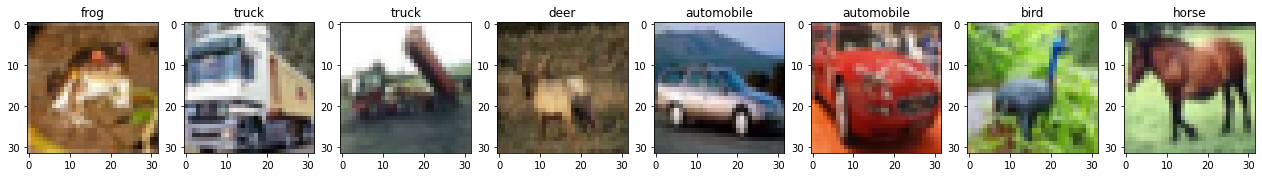

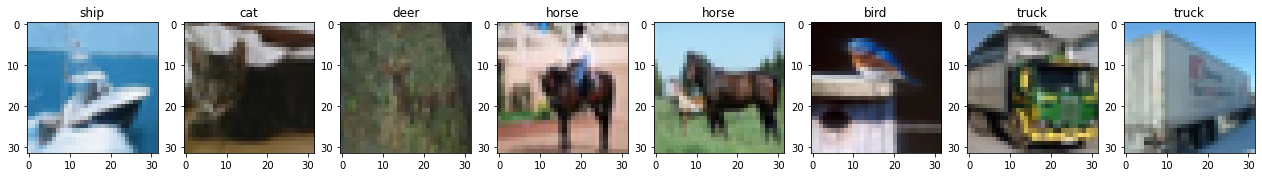

In [7]:
show_images(train_images[:8],train_labels[:8],ncols=8)
show_images(train_images[8:16],train_labels[8:16],ncols=8)

#### Data Preprocessing

image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환. 

label array는 숫자형 값으로 바꾸되, 원 핫 인코딩을 적용할 지 선택합니다. 

일반적으로 원 핫 인코딩을 적용하는게 Keras Framework활용이 용이

In [8]:
def get_preprocessed_data(images,labels):
    images = np.array(images/255.0,dtype=np.float32)
    labels = np.array(labels,dtype=np.float32)

    return images,labels 

train_images,train_labels = get_preprocessed_data(train_images,train_labels)
test_images,test_labels = get_preprocessed_data(test_images,test_labels)

In [9]:
train_images[0,:,:,:]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [10]:
# Keras는 CNN(정확히는 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 Image array는 4차원 배열이 되어야 함.
# RGB 채널 이미지 array는 기본적으로 3차원임. 여기에 이미지의 갯수를 포함하므로 4차원.
# 만일 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시하여 3차원으로 만들어 주고, 여기에 
# 이미지 개수를 포함하여 4차원이 됨.

print(train_images.shape,train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [11]:

train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

In [12]:
train_labels.shape

(50000,)

In [13]:
test_labels.shape

(10000,)

#### Custom Model 생성

CNN Model의 맨 처음 Layer는 Input layer, Input layer의 shape을 이미지 사이즈와 RGB 3채널에

맞게, (32,32,3) 으로 설정.

Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPlooling을 적용한

뒤에는 필터 갯수를 증가 시킴.

MaxPooling 적용 후 출력 피쳐맵의 사이즈는 작아지되, 채널(깊이)은 늘어나는 형태로 모델 생성.

CIFAR10의 Label 수가 10개이므로 Classification을 위한 맨 마지막 Dense Layer의 Unit 갯수는 10개임.

Label 값이 OHE 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentroy이어야 한다. 

만일 Label 값이 OHE이었다면 loss는 categorical_crossentroph임.

In [14]:
IMAGE_SIZE = 32

In [15]:
from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Input,Dense,Conv2D, Dropout,Flatten,Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler 


input_tensor = Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3))

#x = Conv2D(filters=32,kernel_size=(5,5),padding='valid',activation='relu')(input_tensor)
x = Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu')(input_tensor)
x = Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)


x = Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(x)
x = Conv2D(filters=64,kernel_size=(3,3),padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
x = Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# CIFAR10의 클래스가 총 10개 이므로 마지막 classification의 Dense Layer units갯수는 10!


#Fully Connected Layer
x = Flatten(name='flatten')(x)

x = Dropout(rate=0.5)(x)

x = Dense(300,activation='relu',name='fc1')(x)

x = Dropout(rate=0.3)(x)

output = Dense(10,activation='softmax',name='output')(x)

model = Model(inputs=input_tensor,outputs = output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0     

2021-12-07 19:24:28.567015: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/key2317/anaconda3/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-07 19:24:28.567142: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/key2317/anaconda3/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-07 19:24:28.567214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/key2317/anaconda3/lib/python3.8/site-packages/cv2/../../lib64:
2021-12-07 19:24:28.569456: W tensorflow/stream_execu

In [16]:
#optimizer는 Adam, label 값이 원-핫 인코딩이 아니므로, loss는 sparse_categorical_crossentropy
model.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#### Model 학습 수행 및 테스트 데이터 평가

Model의 fit()를 호출하여 학습

fit()은 학습 데이터가 Numpy array 자체로 들어올 때, Generator 형태로 들어올 때 약간의 수행 로직 차이가 있다.

인자로 x = 학습 훈련 데이터, y = 학습 Label 데이터가 들어온다. 

batch_size는 한번에 가져올 image/label array의 갯수이다. 뭉탱이다.

batch를 1개씩 가져오면, 너무 수행 속도가 느리고, 그렇다고 전체를 가져오면 GPU Memory에 부족

따라서 적절한 batch_size를 설정할 필요가 있다. 

만일 학습 데이터가 generator인 경우 fit()에서 batch_size를 설정하지 않는다. 

epoch : 전체 학습 데이터에 대한 훈련을 반복 수행할 횟수

steps_per_epoch : 전체 학습 데이터를 총 몇 번의 배치 작업으로 수행하는가를 의미. 

보통 입력 데이터가 generator일 경우 설정.

validation_data : 검증용 데이터셋

validation_steps : 검증용 데이터의 sgteps_per_epoch 이다.

validation_split은 validation_data로 별도의 검증용 데이터 셋을 설정하지 않고, 자동으로 학습용 데이터에서 

검증용 데이터 세트를 분할 합니다.

In [17]:
history = model.fit(x=train_images,y = train_labels,batch_size=64,epochs=30,validation_split=0.15)

2021-12-07 19:24:29.700179: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
665/665 [==============================] - 32s 47ms/step - loss: 1.6745 - accuracy: 0.3796 - val_loss: 1.2577 - val_accuracy: 0.5408
Epoch 2/30
665/665 [==============================] - 30s 45ms/step - loss: 1.1796 - accuracy: 0.5797 - val_loss: 0.9737 - val_accuracy: 0.6545
Epoch 3/30
665/665 [==============================] - 29s 44ms/step - loss: 0.9900 - accuracy: 0.6484 - val_loss: 0.9290 - val_accuracy: 0.6783
Epoch 4/30
665/665 [==============================] - 29s 43ms/step - loss: 0.8632 - accuracy: 0.6956 - val_loss: 0.7775 - val_accuracy: 0.7276
Epoch 5/30
665/665 [==============================] - 29s 44ms/step - loss: 0.7722 - accuracy: 0.7287 - val_loss: 0.7575 - val_accuracy: 0.7313
Epoch 6/30
665/665 [==============================] - 29s 44ms/step - loss: 0.7122 - accuracy: 0.7478 - val_loss: 0.7152 - val_accuracy: 0.7559
Epoch 7/30
665/665 [==============================] - 30s 45ms/step - loss: 0.6522 - accuracy: 0.7715 - val_loss: 0.7086 - val_accuracy:

313/313 [==============================] - 2s 7ms/step - loss: 0.7173 - accuracy: 0.7930


[0.7172755599021912, 0.7929999828338623]

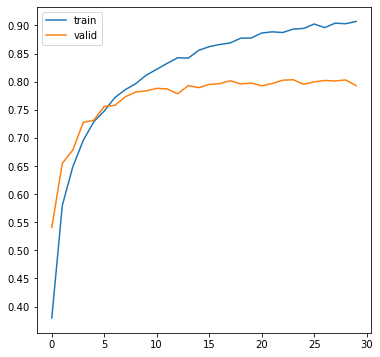

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def show_history(history):
    plt.figure(figsize=(6,6))
    plt.yticks(np.arange(0,1,0.05))
    plt.plot(history.history['accuracy'],label='train')
    plt.plot(history.history['val_accuracy'],label='valid')
    plt.legend()

show_history(history)


model.evaluate(test_images,test_labels)

#### Model.predict()를 통해 이미지 분류 예측

4차원 이미지 배열을 입력해서 모델을 학습함. predict() 시에도 4차원 이미지 배열을 입력해야 한다.

학습 데이터의 원핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원임!

In [22]:
#preds = model.predict(test_images[0])

In [24]:
#테스트용 4차원 이미지 배열을 입력해서 predict() 수행.

#predict()의 결과는 softmax 적용 결과이다.

# 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원

preds= model.predict(np.expand_dims(test_images[0],axis=0))

print('예측 결과 shape :',preds.shape)
print('예측 결과 :',preds)


예측 결과 shape : (1, 10)
예측 결과 : [[1.2322048e-03 6.0828088e-04 2.9799429e-04 7.5587231e-01 1.8090788e-04
  2.2249016e-01 1.5441485e-02 1.2241015e-03 2.1122750e-03 5.4032146e-04]]


In [27]:
preds = model.predict(test_images[:32],batch_size=32)
print('예측 결과 shape:',preds.shape)
print('예측 결과 :',preds)
#소맥은 2차원, 이것을 32개 가져왔으니 3차원


예측 결과 shape: (32, 10)
예측 결과 : [[1.23220484e-03 6.08280709e-04 2.97994033e-04 7.55872369e-01
  1.80907722e-04 2.22490087e-01 1.54414792e-02 1.22410047e-03
  2.11227313e-03 5.40321460e-04]
 [3.13788417e-09 4.11934741e-02 5.71832646e-18 1.28801922e-19
  3.22797954e-19 3.01132097e-20 6.28478992e-17 5.23137161e-22
  9.58806515e-01 6.50592247e-09]
 [1.57692516e-03 3.09768394e-02 1.75318622e-04 1.81139242e-02
  2.17190118e-05 1.43757835e-02 4.17183001e-05 2.33379149e-04
  9.31147575e-01 3.33676883e-03]
 [8.08679760e-01 2.23878748e-03 6.66103850e-04 8.17952696e-06
  3.11388544e-06 4.75332236e-08 4.78218863e-05 3.56143744e-07
  1.86683357e-01 1.67257397e-03]
 [1.05130944e-07 2.12246110e-10 7.29864812e-04 7.03646356e-06
  3.81193473e-03 2.99306890e-07 9.95450675e-01 5.80520874e-11
  1.36085754e-09 1.81237872e-10]
 [2.25330155e-06 5.68432552e-06 7.44940335e-05 6.86512445e-04
  2.31191938e-04 1.31500058e-03 9.97636437e-01 2.07080870e-06
  2.79592632e-06 4.35886577e-05]
 [1.42928855e-07 4.96270418e

In [28]:
predicted_class = np.argmax(preds,axis=1) 
print('예측 클래스 값 :',predicted_class)

예측 클래스 값 : [3 8 8 0 6 6 9 4 3 9 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 3 5 0 9 6 6 5]


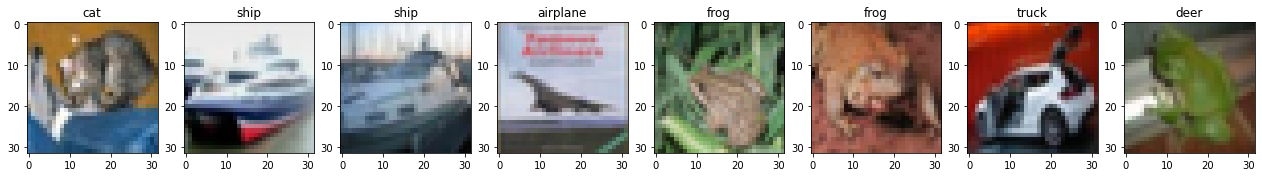

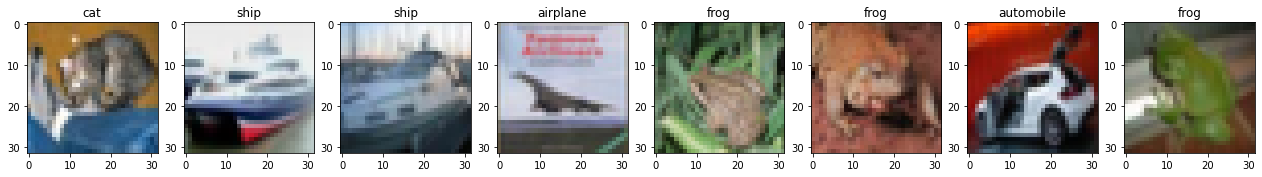

In [29]:
show_images(test_images[:8],predicted_class[:8],ncols=8)
show_images(test_images[:8],test_labels[:8],ncols=8)

#### 평균이 1이고, 표준편차가 1인 표준 정규분포에서 난수를 추출

표준 편차가 클수록 개별 값의 크기가 일반적으로 커진다.

In [30]:
numbers = np.random.normal(loc=0.0,scale=1,size=[100,100])

print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())


[[-0.33387543  0.21133404  1.23934064 ... -1.17203423 -0.84038745
   1.70196871]
 [-0.25130858 -2.21540213  1.40735088 ... -0.15501585 -0.35407669
  -1.09137627]
 [ 0.96497131  0.56120751  0.9299869  ...  0.59878282  0.59234157
   1.587836  ]
 ...
 [ 0.14254294  1.32273472 -0.21401769 ...  0.4850888   0.22864642
  -0.76345774]
 [ 0.66324668 -0.10099252 -1.21424663 ... -0.64635377 -0.08837365
   0.45774926]
 [ 0.33674097 -0.8999187  -0.35539998 ... -0.21285116  0.76202685
  -0.16266785]]
-0.007959505296811466
0.9800490129738695
-79.59505296811466
